# Author: CHINEDU EBERECHUKWU QUEENSLEY

# Project: DATA SCIENCE AND BUSINESS ANALYTICS     INTERNSHIP AT SPARKS

# TASK 6: Prediction using Supervised ML

In [40]:
import pandas as pd

# For plotting charts
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [41]:
# Import dataset
df = pd.read_csv("Iris.csv", \
            usecols=["SepalLengthCm","SepalWidthCm", "PetalLengthCm","PetalWidthCm","Species"]
           )

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Plots

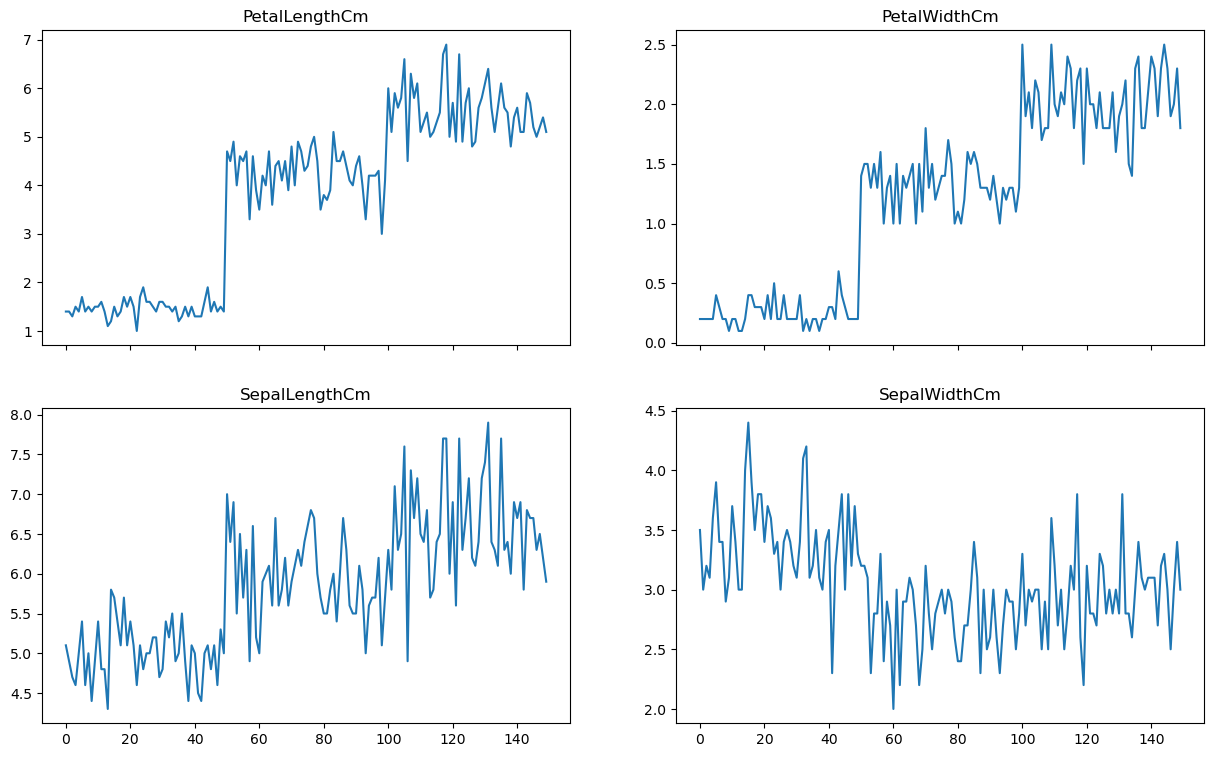

In [43]:
fig, ax = plt.subplots(2,2, figsize=(15, 9), sharex= True)

ax[0,0].plot(df['PetalLengthCm'])
ax[0,0].set_title('PetalLengthCm')

ax[0,1].plot(df['PetalWidthCm'])
ax[0,1].set_title('PetalWidthCm')

ax[1,0].plot(df['SepalLengthCm'])
ax[1,0].set_title('SepalLengthCm')

ax[1,1].plot(df['SepalWidthCm'])
ax[1,1].set_title('SepalWidthCm')

plt.show();


## Create Feature Matrix and Target Vector

In [44]:
X = df.drop("Species", axis = 1)
y = df["Species"]

### Train - Test Split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [46]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


### Train - Validation Split

In [47]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state= 42)

### Tune Hyperparameter

In [48]:
depth_hyperparams = range(1,10,2)

In [49]:
# Create empty lists for training and validation accuracy scores
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    
    # Create model with `max_depth` of `d`
    test_model = DecisionTreeClassifier(random_state= 42, max_depth = d)
    
    # Fit model to training data
    test_model.fit(X_train, y_train)
    
    # Calculate training accuracy score and append to `training_acc`
    training_acc.append(test_model.score(X_train, y_train))
    
    # Calculate validation accuracy score and append to `training_acc`
    validation_acc.append(accuracy_score(y_val, test_model.predict(X_val)))
    
print("Training Accuracy Scores:", training_acc[:3])
print("Validation Accuracy Scores:", validation_acc[:3])

Training Accuracy Scores: [0.6875, 0.96875, 0.9895833333333334]
Validation Accuracy Scores: [0.5416666666666666, 0.9166666666666666, 0.9166666666666666]


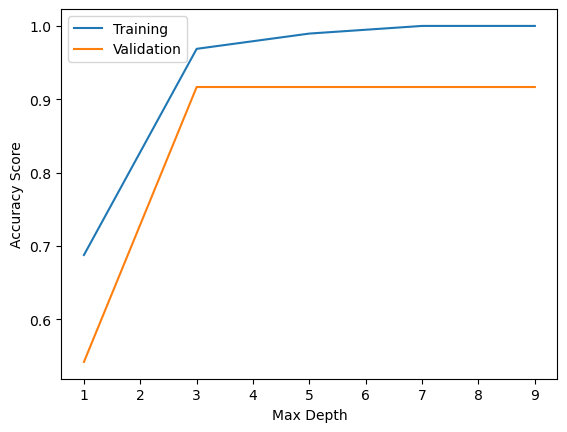

In [50]:
# Plot `depth_hyperparams`, `training_acc`
plt.plot(depth_hyperparams, training_acc, label = "Training")
plt.plot(depth_hyperparams, validation_acc, label = "Validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.legend()

From the diagram above, it can be observed that at a depth of 3, the validation set stops improving. Hence, a depth of 3 will be used in this model

## Create Model

In [51]:
model = DecisionTreeClassifier(max_depth= 3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [52]:
y_pred = model.predict(X_test)

In [70]:
print(f'Accuracy Score: {round(accuracy_score(y_test, y_pred), 2)}')

Accuracy Score: 0.97


In [55]:
cm = confusion_matrix(y_test, y_pred)

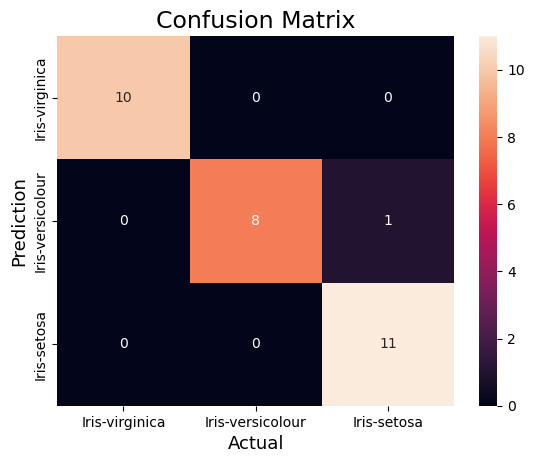

In [66]:
sns.heatmap(
    cm,
    annot = True,
    fmt = 'g',
    xticklabels=['Iris-virginica', 'Iris-versicolour', 'Iris-setosa'],
    yticklabels= ['Iris-virginica', 'Iris-versicolour', 'Iris-setosa']
)
plt.ylabel('Prediction', fontsize = 13)
plt.xlabel('Actual', fontsize = 13)
plt.title('Confusion Matrix', fontsize = 17);

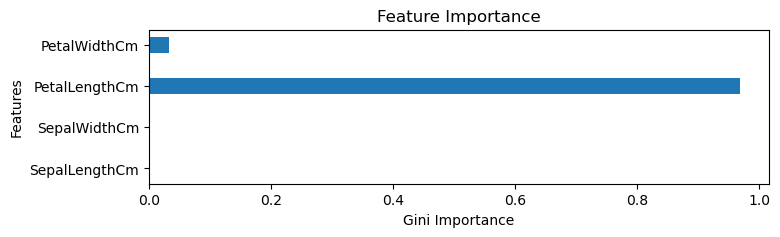

In [57]:
fig, ax = plt.subplots(figsize = (8, 2))
plt.barh(model.feature_names_in_, model.feature_importances_, height = 0.4, figure = fig)
plt.ylabel("Features")
plt.xlabel("Gini Importance")
plt.title("Feature Importance");

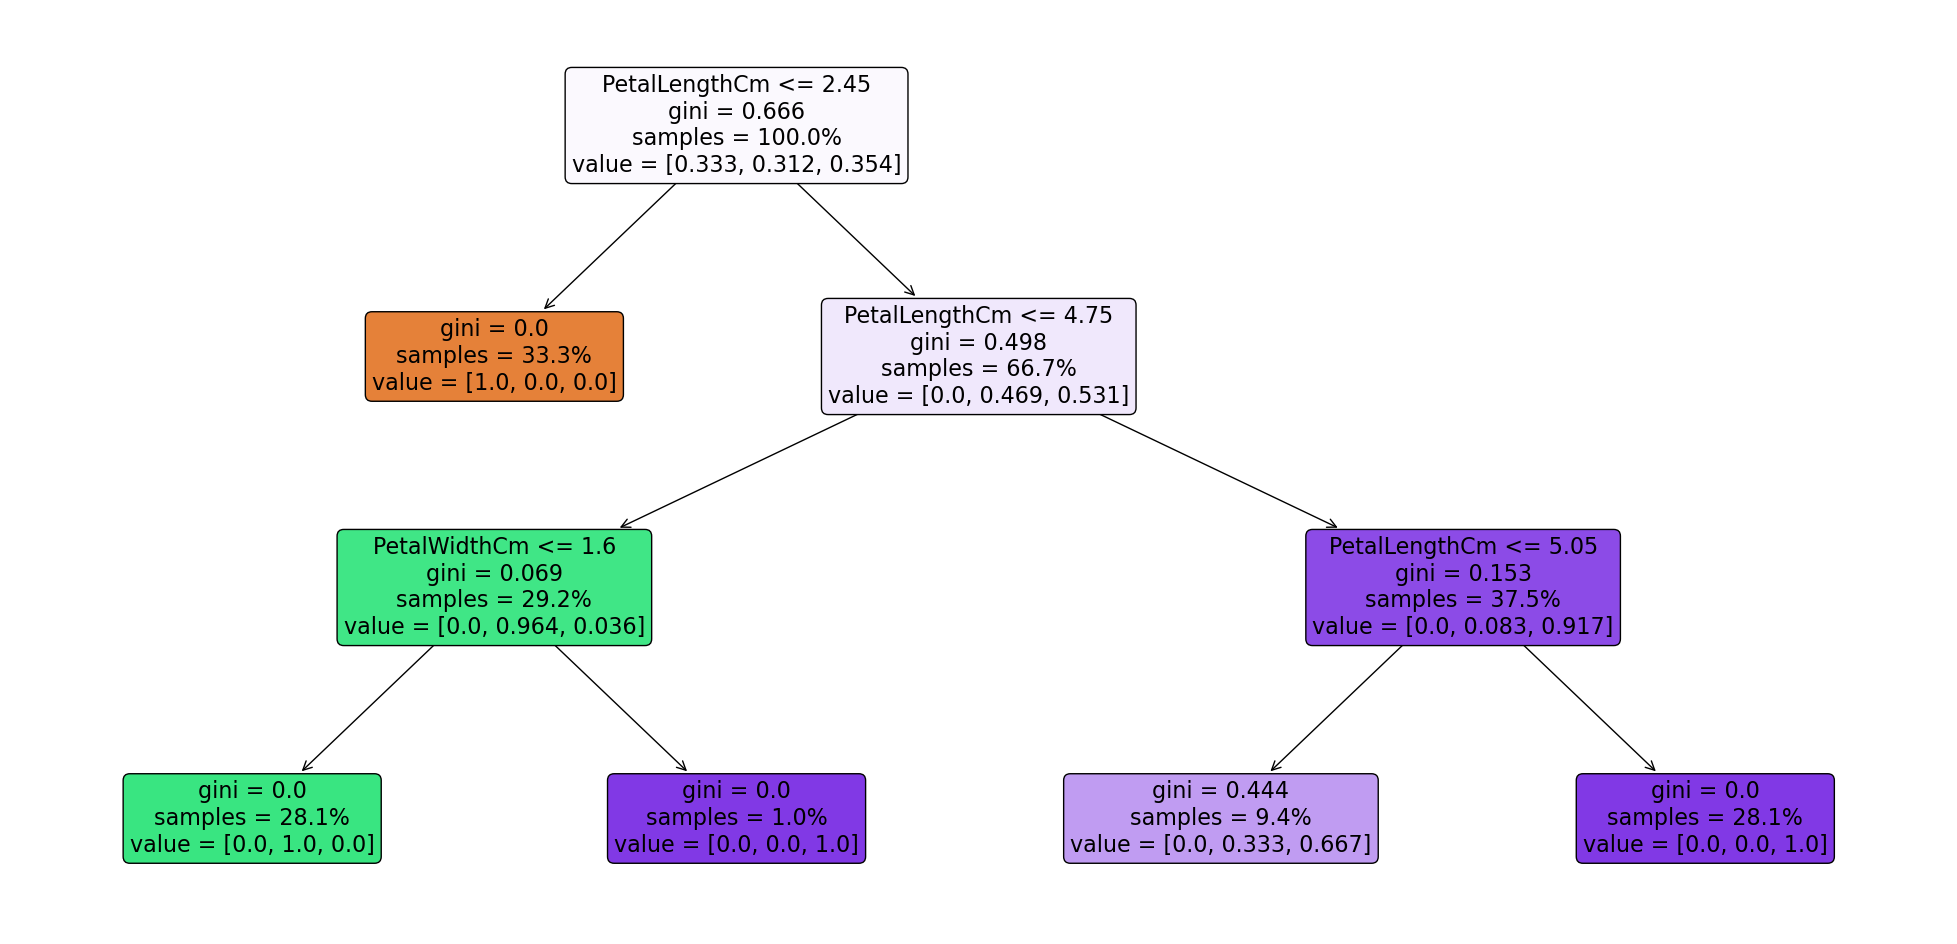

In [58]:
# Create larger figure
fig, ax = plt.subplots(figsize=(25, 12))

# Plot tree
plot_tree(
    decision_tree= model ,
    feature_names=X_train.columns,
    filled=True, # Color leaf with class
    rounded=True, # Round leaf edges
    proportion=True, # Display proportion of classes in leaf
    fontsize=16, # Enlarge font
    ax=ax, # Place in figure axis
);